# Load data

In [1]:
import pandas as pd 
df = pd.read_csv("fake_job_postings.csv")
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


# Understand the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [6]:
# Class distribution of the target
print("\n=== Fraudulent column distribution ===")
print(df['fraudulent'].value_counts())

# Percentage distribution
print("\n=== Percentage distribution ===")
print(df['fraudulent'].value_counts(normalize=True) * 100)


=== Fraudulent column distribution ===
fraudulent
0    17014
1      866
Name: count, dtype: int64

=== Percentage distribution ===
fraudulent
0    95.1566
1     4.8434
Name: proportion, dtype: float64


<Axes: xlabel='fraudulent', ylabel='count'>

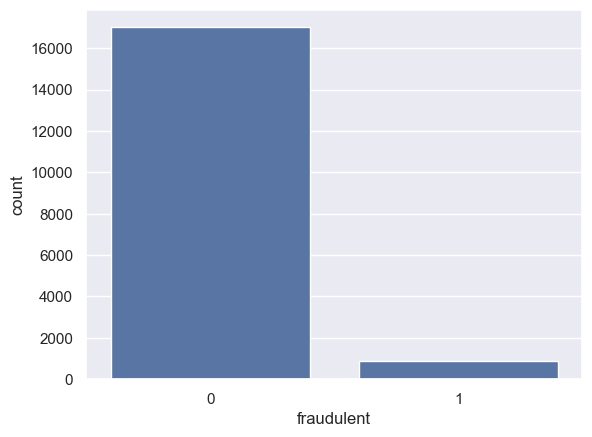

In [5]:
import seaborn as sns

sns.set(style="darkgrid")
sns.countplot(x='fraudulent', data=df)

# Nulls

In [4]:
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
for c in df.columns:
        if df[c].dtype == object:
            df[c] = df[c].fillna("")

In [7]:
df.isnull().sum()

job_id                 0
title                  0
location               0
department             0
salary_range           0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

In [7]:
TEXT_COLUMNS_DEFAULT = [
    "title","company_profile","description","requirements",
    "benefits","department","industry","function","employment_type",
    "required_experience","required_education","location","salary_range"
]

In [8]:
def load_data(path, target_col="fraudulent"):
    df = pd.read_csv(path)
    # fill NAs
    for c in df.columns:
        if df[c].dtype == object:
            df[c] = df[c].fillna("")
    cols = [c for c in TEXT_COLUMNS_DEFAULT if c in df.columns]
    if not cols:
        cols = [c for c in df.columns if df[c].dtype==object and c != target_col]
    text = df[cols].astype(str).agg(" ".join, axis=1)
    text = (text
            .str.replace(r"https?://\S+", " ", regex=True)
            .str.replace(r"[^\w\s]", " ", regex=True)
            .str.replace(r"\s+", " ", regex=True)
            .str.strip()
            .str.lower())
    df = df.assign(text=text)
    return df

df = load_data("fake_job_postings.csv")
df

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,text
0,1,Marketing Intern,"US, NY, New York",Marketing,,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,0,1,0,Other,Internship,,,Marketing,0,marketing intern we re food52 and we ve create...
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,,Marketing and Advertising,Customer Service,0,customer service cloud video production 90 sec...
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",,,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,0,1,0,,,,,,0,commissioning machinery assistant cma valor se...
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,account executive washington dc our passion fo...
4,5,Bill Review Manager,"US, FL, Fort Worth",,,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,bill review manager spotsource solutions llc i...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,,Computer Software,Sales,0,account director distribution vend is looking ...
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0,payroll accountant weblinc is the e commerce p...
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",,,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,,0,0,0,Full-time,,,,,0,project cost control staff engineer cost contr...
17878,17879,Graphic Designer,"NG, LA, Lagos",,,,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0,graphic designer nemsia studios is looking for...


In [9]:
df.isnull().sum()

job_id                 0
title                  0
location               0
department             0
salary_range           0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
text                   0
dtype: int64

# Vecotization and model building

In [10]:
X = df["text"].values
y = df['fraudulent'].astype(int).values

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    max_features=50000,
    ngram_range=(1,2),
    stop_words='english'
)

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)
X_train_vec.shape, X_test_vec.shape

((14304, 50000), (3576, 50000))

# Handling class imbalance

In [13]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

class_weights_dict = {0: class_weights[0], 1: class_weights[1]}
class_weights_dict


{0: np.float64(0.5254573506722504), 1: np.float64(10.32034632034632)}

In [14]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
    class_weight='balanced',
    max_iter=2000
)

model.fit(X_train_vec, y_train)

LogisticRegression(class_weight='balanced', max_iter=2000)

In [15]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test_vec)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3365   38]
 [  15  158]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3403
           1       0.81      0.91      0.86       173

    accuracy                           0.99      3576
   macro avg       0.90      0.95      0.92      3576
weighted avg       0.99      0.99      0.99      3576



# Saving the models

In [16]:
import pickle

with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

with open("vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)

with open("xtrain.pkl", "wb") as f:
    pickle.dump(X_train_vec, f)


In [28]:
df[['text','fraudulent']].iloc[0:5]

,text,fraudulent
0,marketing intern we re food52 and we ve create...,0
1,customer service cloud video production 90 sec...,0
2,commissioning machinery assistant cma valor se...,0
3,account executive washington dc our passion fo...,0
4,bill review manager spotsource solutions llc i...,0


In [15]:
df[df['fraudulent']==0]['text'].iloc[0]

'marketing intern we re food52 and we ve created a groundbreaking and award winning cooking site we support connect and celebrate home cooks and give them everything they need in one place we have a top editorial business and engineering team we re focused on using technology to find new and better ways to connect people around their specific food interests and to offer them superb highly curated information about food and cooking we attract the most talented home cooks and contributors in the country we also publish well known professionals like mario batali gwyneth paltrow and danny meyer and we have partnerships with whole foods market and random house food52 has been named the best food website by the james beard foundation and iacp and has been featured in the new york times npr pando daily techcrunch and on the today show we re located in chelsea in new york city food52 a fast growing james beard award winning online food community and crowd sourced and curated recipe hub is curr

In [32]:
df['text'].iloc[0]

'marketing intern we re food52 and we ve created a groundbreaking and award winning cooking site we support connect and celebrate home cooks and give them everything they need in one place we have a top editorial business and engineering team we re focused on using technology to find new and better ways to connect people around their specific food interests and to offer them superb highly curated information about food and cooking we attract the most talented home cooks and contributors in the country we also publish well known professionals like mario batali gwyneth paltrow and danny meyer and we have partnerships with whole foods market and random house food52 has been named the best food website by the james beard foundation and iacp and has been featured in the new york times npr pando daily techcrunch and on the today show we re located in chelsea in new york city food52 a fast growing james beard award winning online food community and crowd sourced and curated recipe hub is curr

# SHAP explainability

In [17]:
import shap

# SHAP needs dense matrix for linear models
explainer = shap.LinearExplainer(model, X_train_vec, feature_names=vectorizer.get_feature_names_out())

# Single instance

In [18]:
text = "Great job with high salary. Apply now!"
vec = vectorizer.transform([text])

shap_values = explainer.shap_values(vec)


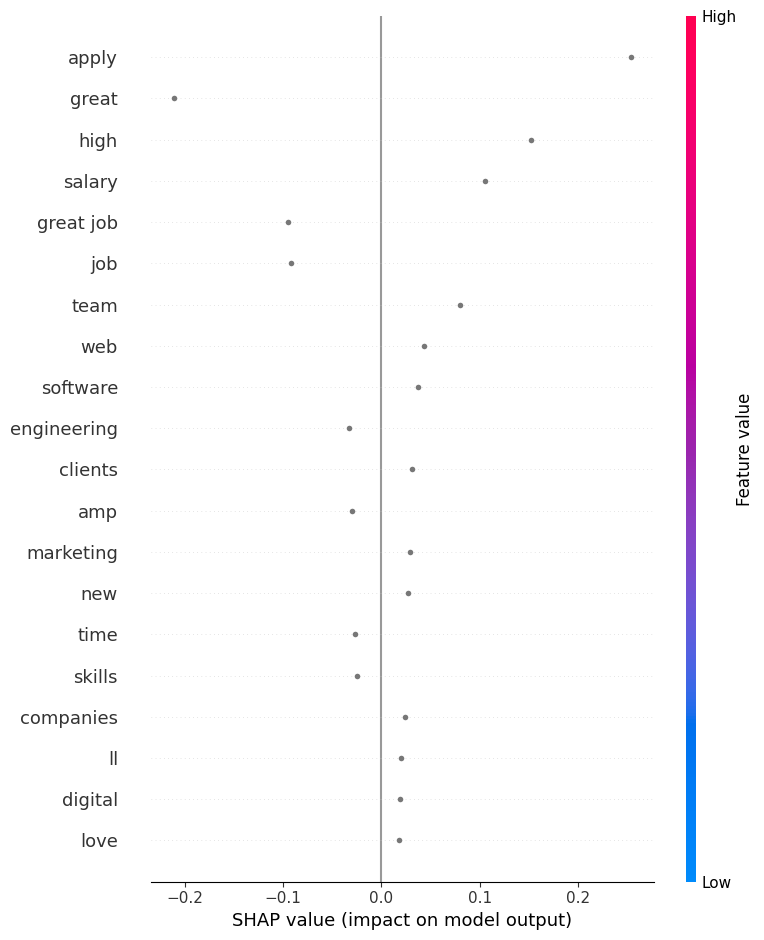

In [20]:
shap.summary_plot(shap_values, vec, feature_names=vectorizer.get_feature_names_out())

In [19]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], feature_names=vectorizer.get_feature_names_out())

# On X-test

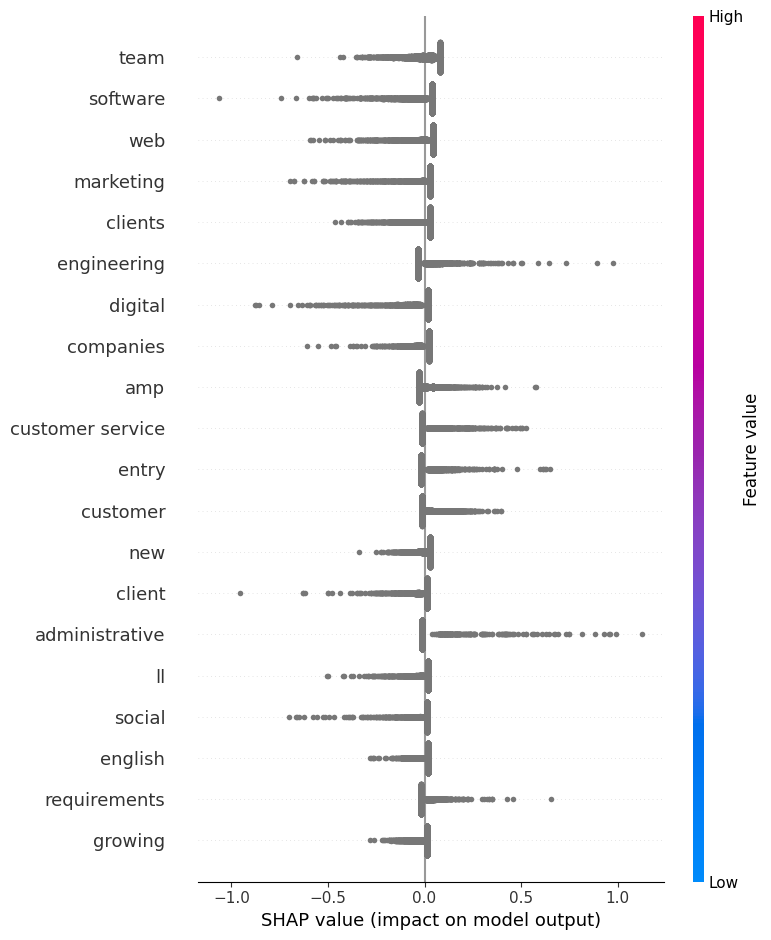

In [24]:
shap_values = explainer.shap_values(X_test_vec)
shap.summary_plot(shap_values, X_test_vec, feature_names=vectorizer.get_feature_names_out())

In [3]:
import numpy 
print("numpy:",numpy.__version__)
import shap
print("shap:",shap.__version__)
import sklearn
print("sklearn:",sklearn.__version__)

numpy: 2.2.3
shap: 0.48.0
sklearn: 1.6.1


1.6.1
